In [1]:
import sys
sys.path.append("../..")

import pandas
import math

from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from pandas import DataFrame

# Import dictonaries and Types
from app.components.basic_dataframes import dictMealState, dfMealCode, dfMealState
from app.components.simple_types import Nutrition, State
from app.components.extract_data.extract_data import *

# Use simple function
from app.components.search.papa_search import papaSingleSeach, SearchResult, fitness

from app.components.graphs.polar import plot_multiple_polar_charts

from app.components.extract_data.dataframes.dictionaries.nutrients import nutrients_signal

import random
import pickle
from IPython.display import clear_output

# Use simple function
from app.components.search.papa_search import papaSingleSeach, SearchResult

#Import graphic
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=300)

Loading basic data
Loading basic dictionary
Finish!


<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

In [2]:
print(nutrients_signal)

{'ENERGIA_KCAL': '<', 'CHOTOT': '>', 'PTN': '>', 'LIP': '<', 'FIBRA': '>', 'COLEST': '<', 'CALCIO': '>', 'AGTRANS': '<', 'AGSAT': '<', 'AGPOLI': '<', 'SODIO': '<', 'POTASSIO': '>', 'FERRO': '>', 'MAGNESIO': '>', 'TIAMINA': '>', 'RIBOFLAVINA': '>', 'PIRIDOXAMINA': '>', 'NIACINA': '>', 'COBALAMINA': '>', 'VITC': '>', 'VITA_RAE': '>', 'COBRE': '>', 'FOLATO': '>', 'FOSFORO': '>', 'ZINCO': '>'}


In [3]:
fileNames = ["female25_100_agent_50007.pickle",
             "male25_100_agent_50007.pickle",
             "female60_100_agent_50007.pickle",
             "male60_100_agent_50007.pickle"]

fileNames = ["female25_100_agent_100007.pickle",
             "male25_100_agent_100007.pickle",
             "female60_100_agent_100007.pickle",
             "male60_100_agent_100007.pickle"]

groupNames = ["W25",
              "M25",
              "W60",
              "M60"]

quantity = 100

In [4]:
def getResults(fileName:str):
    try:
        with open("./output/" + fileName, "rb") as file:
            results = pickle.load(file)
            return [ result for id, result in results.items() ]
        
    except:
        raise FileNotFoundError

In [5]:
results = [getResults(fileName) for fileName in fileNames]

In [6]:
def get_result_by(resultList:list[list[SearchResult]], nutrient:str, type:str="nutrition"):
    if type=="nutrition":
        data_input = {
            "variable_name": nutrient, 
            "x_data": [], 
            "y_data": [], 
            "x_label": '1600 kcal - 2200 kcal', 
            'y_label': '2400 kcal - 3000 kcal'}
        
        
        data_input["x_data"] = np.array([ min(1.0, result[0].initialNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result[0].personIDs[0])[nutrient]) for result in resultList])
        data_input["y_data"] = np.array([ min(1.0, result[1].finalNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result[1].personIDs[0])[nutrient]) for result in resultList])       
            
        # print(len(data_input["x_data"]))
        return data_input
    else:
        data_input = {
            "variable_name": nutrient, # Group 
            "x_data": [], 
            "y_data": [], 
            "x_label": 'Initial', 
            'y_label': 'Final'}

        data_input["x_data"] = np.array([ min(1.0, result[0].initialNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result[0].personIDs[0])[nutrient]) for result in resultList])
        data_input["y_data"] = np.array([ min(1.0, result[1].finalNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result[1].personIDs[0])[nutrient]) for result in resultList])       
            
        return data_input

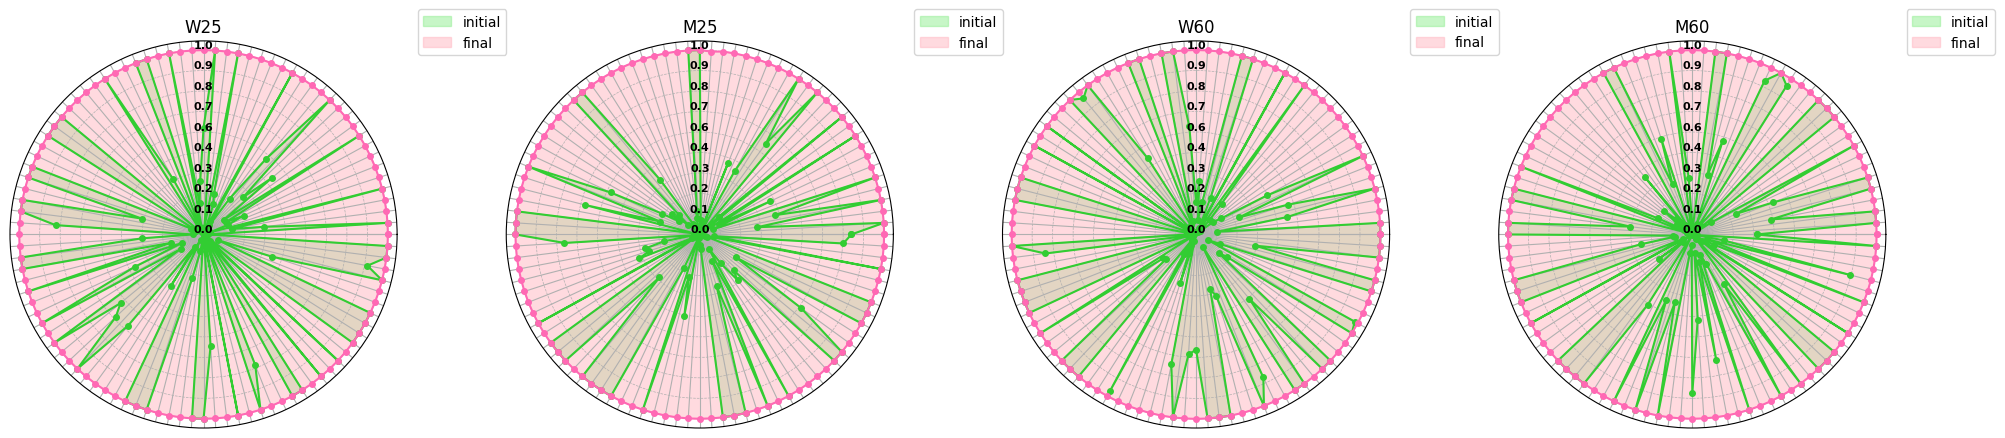

In [7]:

labels = [ "" for x in range(quantity)]

def getVIT(result, groupName, vit):
    resultVITC = get_result_by(result, vit)
    resultVITC["variable_name"] = groupName
    resultVITC["x_label"] = "initial"
    resultVITC["y_label"] = "final" 
    return resultVITC


resultsVITC =  [getVIT(results[i], groupNames[i], "VITC") for i in range(4)]
plot_multiple_polar_charts(resultsVITC, num_points=quantity, labels=labels)

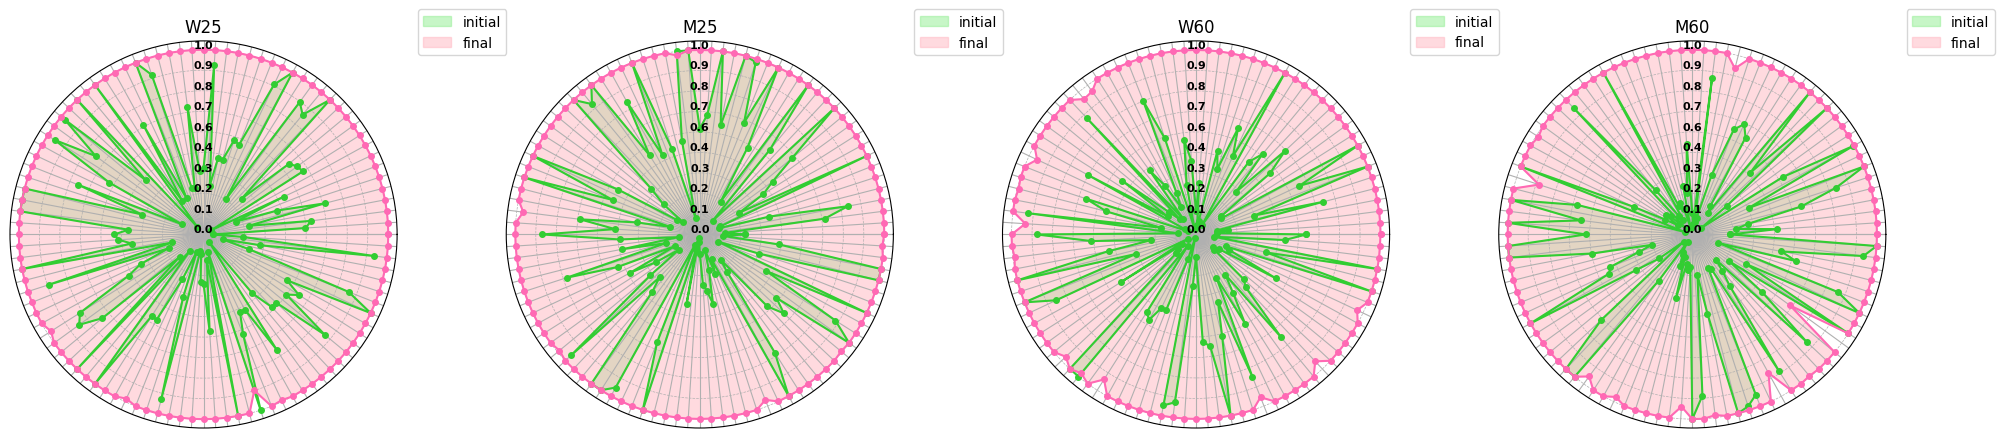

In [8]:
labels = [ "" for x in range(quantity)]

resultsPIRI =  [getVIT(results[i], groupNames[i], "PIRIDOXAMINA") for i in range(4)]
plot_multiple_polar_charts(resultsPIRI, num_points=quantity, labels=labels)

In [9]:
def get_result_by_greater_than(resultList:list[list[SearchResult]], nutrients:list[str]):
    data_input = {
        "variable_name": "GREATER", 
        "x_data": [], 
        "y_data": [], 
        "x_label": '1600 kcal - 2200 kcal', 
        'y_label': '2400 kcal - 3000 kcal'}
    
    
    # Initial
    data_input["x_data"] = np.array( [0.0 for x in range(quantity)])
    # Final
    data_input["y_data"] = np.array( [0.0 for x in range(quantity)])
    
    for i, result in enumerate(resultList):
        personId = result[0].personIDs[0]
        initialNutrition = result[0].initialNutrition
        finalNutrition = result[3].finalNutrition
        data_input["x_data"][i] = Nutrition.nutritionAdequancyByPersonId(initialNutrition, personId)
        data_input["y_data"][i] = Nutrition.nutritionAdequancyByPersonId(finalNutrition, personId)
     
        
    return data_input

In [10]:
greaters = [ nutrient for nutrient, signal in nutrients_signal.items() if signal==">"]
less = [ nutrient for nutrient, signal in nutrients_signal.items() if signal=="<"]

W25 100 100
M25 100 100
W60 100 100
M60 100 100


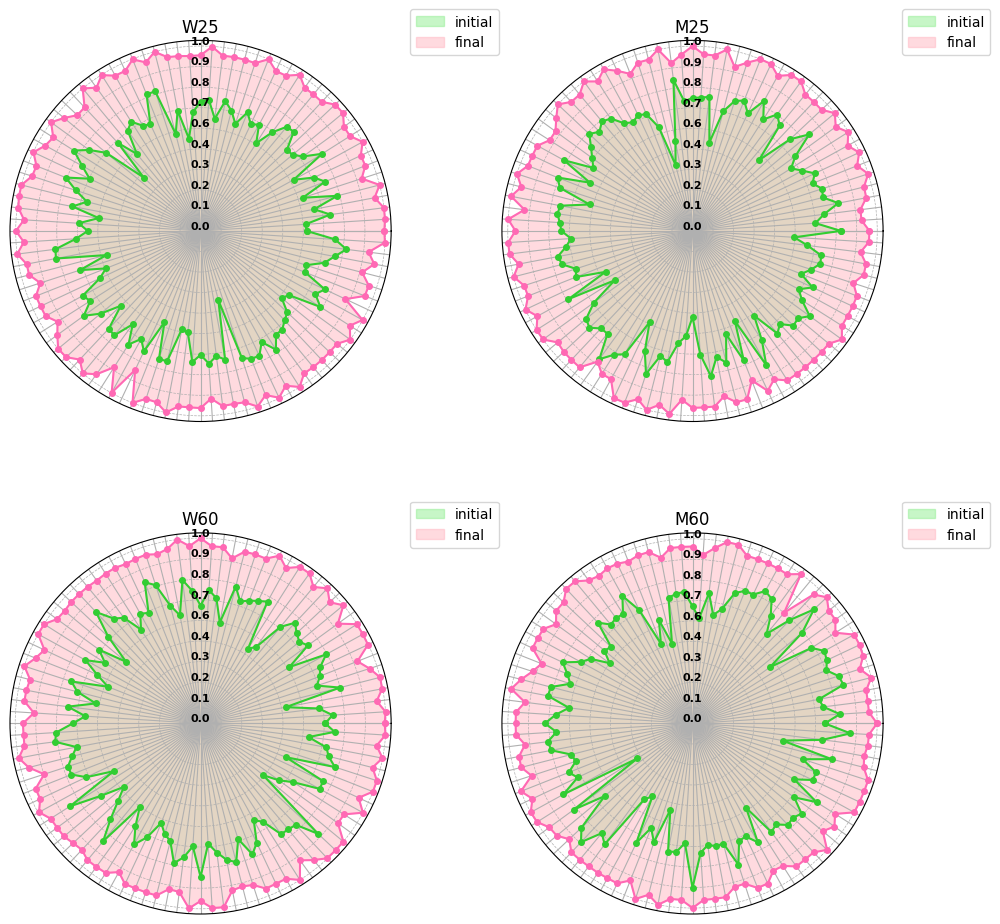

W25 0.6681155268461763 0.9641138243964065 0.2959982975502302
M25 0.6947006699156008 0.9612987202120711 0.2665980502964703
W60 0.6804233736614358 0.9627829906393314 0.2823596169778956
M60 0.7037926270175664 0.9576704967474964 0.25387786972993


In [11]:
labels = [ "" for x in range(quantity)]
nutrients = greaters

def getAll(result, groupName):
    resultG = get_result_by_greater_than(result, nutrients)
    resultG["variable_name"] = groupName
    resultG["x_label"] = "initial"
    resultG["y_label"] = "final" 
    return resultG

resultsAll =  [getAll(results[i], groupNames[i]) for i in range(4)]

for i in range(4):
    print(groupNames[i], len(resultsAll[i]["x_data"]), len(resultsAll[i]["y_data"]))
   

plot_multiple_polar_charts(resultsAll, num_points=quantity, labels=labels, rows=2, cols=2)

for i in range(4):
    print(groupNames[i], np.mean(resultsAll[i]["x_data"]), np.mean(resultsAll[i]["y_data"]), np.mean(resultsAll[i]["y_data"])-np.mean(resultsAll[i]["x_data"]))

In [12]:
# 1st Iteration
# Group 01 0.6955511755088728 0.966037688701486 0.2704865131926132
# Group 02 0.7364985829897782 0.9739890889454794 0.2374905059557012
# Group 03 0.6916096027256987 0.959551672593434 0.2679420698677353
# Group 04 0.7238687172115409 0.9646477736120284 0.24077905640048747

# 2nd Iteration
# Group 01 0.966037688701486 0.973362914841424 0.007325226139938024
# Group 02 0.9739890889454794 0.9829523699543773 0.008963281008897872
# Group 03 0.959551672593434 0.9682908629939342 0.008739190400500196
# Group 04 0.9646477736120284 0.9746530085712513 0.010005234959222897

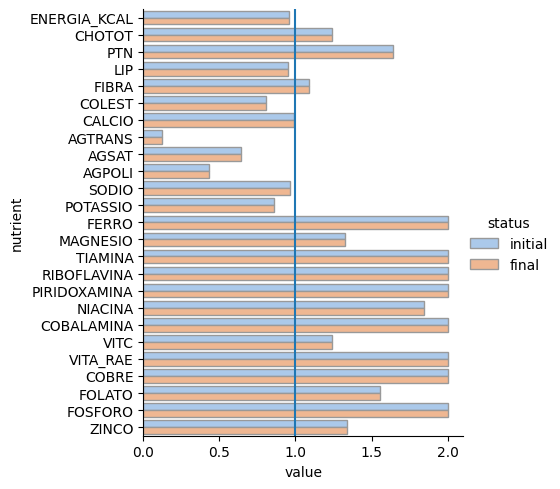

In [13]:
results[0][0][3].show_comparison_graph()

In [14]:
from app.components.scripts.get_tbca import TBCA

dictTBCAName = TBCA.getDictTBCA()
dictV9001ToTBCA = getDictV9001ToTbca()

In [15]:
# 6303102 - Init: 17.0  / Final: 67.0
# 7004301 - Init: 40.0  / Final: 0.0
# 8400101 - Init: 16.0  / Final: 0.0
# 8004801 - Init: 65.0  / Final: 15.0
# 6501415 - Init: 0.0  / Final: 50.0
# 6501401 - Init: 0.0  / Final: 50.0
# 6900821 - Init: 0.0  / Final: 50.0
print(dictTBCAName[dictV9001ToTBCA["7004301"]])
print(dictTBCAName[dictV9001ToTBCA["8400101"]])
print(dictTBCAName[dictV9001ToTBCA["8004801"]])
print(dictTBCAName[dictV9001ToTBCA["6900821"]])
# print(dictTBCAName[dictV9001ToTBCA["6501401"]])
# print(dictTBCAName[dictV9001ToTBCA["6900821"]])
# print(dictTBCAName[dictV9001ToTBCA["8500224"]])
# print(dictTBCAName[dictV9001ToTBCA["7901201"]])

# 6501401 - Init: 40.0  / Final: 140.0
# 8502301 - Init: 0.0  / Final: 50.0
# 8216601 - Init: 0.0  / Final: 50.0
# 6500903 - Init: 0.0  / Final: 75.0
# 7900710 - Init: 0.0  / Final: 100.0

tbca code: C0031D
portuguese: Maionese, molho, tradicional  
english: Mayonnaise, with eggs, industrialized
nutrients: {'ENERGIA_KCAL': 3.06, 'CHOTOT': 0.079, 'PTN': 0.0058, 'LIP': 0.305, 'FIBRA': 0.0, 'COLEST': 0.425, 'AGSAT': 0.040999999999999995, 'AGPOLI': 0.154, 'AGTRANS': 0.0017000000000000001, 'CALCIO': 0.0348, 'FERRO': 0.001, 'SODIO': 7.86, 'MAGNESIO': 0.0086, 'FOSFORO': 0.145, 'POTASSIO': 0.161, 'ZINCO': 0.0006, 'COBRE': 0.0, 'VITA_RAE': 0.0827, 'TIAMINA': 0.0, 'RIBOFLAVINA': 0.0005, 'NIACINA': 0.0, 'PIRIDOXAMINA': 0.0, 'COBALAMINA': 0.0005, 'VITC': 0.0, 'FOLATO': 0.0208}
tbca code: C0002D
portuguese: Azeite, olivaOlea europaeaL. 
english: Oil, olives
nutrients: {'ENERGIA_KCAL': 9.0, 'CHOTOT': 0.0, 'PTN': 0.0, 'LIP': 1.0, 'FIBRA': 0.0, 'COLEST': 0.0, 'AGSAT': 0.149, 'AGPOLI': 0.095, 'AGTRANS': 0.0, 'CALCIO': 0.0, 'FERRO': 0.0001, 'SODIO': 0.0, 'MAGNESIO': 0.0, 'FOSFORO': 0.0, 'POTASSIO': 0.0, 'ZINCO': 0.0, 'COBRE': 0.0, 'VITA_RAE': 0.0, 'TIAMINA': 0.0, 'RIBOFLAVINA': 0.0, 'NIAC

In [16]:
print(results[0][7][0].get_food_groups(initial=True))
print(results[0][7][2].get_food_groups(initial=False))

{'Meat products': 72.0, 'Seeds and nuts': 0.0, 'Legume products': 560.0, 'Vegetable products': 95.0, 'Beverages': 3200.0, 'Milk and dairy products': 0.0, 'Foods for special purposes': 0.0, 'Cereal products': 270.0, 'Sugary products': 0.0, 'Miscellaneous': 0.0, 'Fish and seafood': 0.0, 'Eggs and egg products': 0.0, 'Fruits and fruit products': 300.0, 'Fats and oils': 0.0}
{'Meat products': 0.0, 'Seeds and nuts': 0.0, 'Legume products': 560.0, 'Vegetable products': 100.0, 'Beverages': 3200.0, 'Milk and dairy products': 0.0, 'Foods for special purposes': 50.0, 'Cereal products': 220.0, 'Sugary products': 100.0, 'Miscellaneous': 0.0, 'Fish and seafood': 50.0, 'Eggs and egg products': 0.0, 'Fruits and fruit products': 450.0, 'Fats and oils': 0.0}


In [17]:
nutrients = list(set(getDictV9001ToGroupEnNames().values()))
nutrients = {groupName:id for id,groupName in enumerate(nutrients) }	
len(nutrients)

14

In [18]:
def get_result_by_groups(resultList:list[list[SearchResult]], first=0, last=3):
    nutrients = getListGroupsEn()
    nutrients = {groupName:id for id,groupName in enumerate(nutrients) }	
    
    data_input = {
        "variable_name": "GREATER", 
        "x_data": [], 
        "y_data": [], 
        "x_label": '1600 kcal - 2200 kcal', 
        'y_label': '2400 kcal - 3000 kcal'}
    
    data_input["x_data"] = np.array( [0.0 for x in range(len(nutrients))])
    data_input["y_data"] = np.array( [0.0 for x in range(len(nutrients))])
    
    resultsInitial = [ result[first].get_food_groups() for result in resultList ]
    resultsFinal = [ result[last].get_food_groups(initial=False) for result in resultList ]
    

    for nutrient, id in nutrients.items():
        for result in resultsInitial:
            data_input["x_data"][id] += (result[nutrient])/len(resultList)
            
        for result in resultsFinal:
            data_input["y_data"][id] += (result[nutrient])/len(resultList)
     
        
    return data_input

In [19]:
nutrients = getListGroupsEn()
nutrients

['Vegetable products',
 'Miscellaneous',
 'Meat products',
 'Seeds and nuts',
 'Fruits and fruit products',
 'Sugary products',
 'Eggs and egg products',
 'Cereal products',
 'Beverages',
 'Foods for special purposes',
 'Fats and oils',
 'Legume products',
 'Milk and dairy products',
 'Fish and seafood']

In [20]:
def showGroupBarGraph(dictData:dict, ignoredGroups:list[str]=None):
    """show Group Bar Graph
        ignoredGroups is a list of not showing groups
    Args:
        dictData (dict):
        "variable_name": "Variable name", 
        "x_data": [2,4,6,3], 
        "y_data": [2,4,6,3], 
        "x_label": 'X description', 
        'y_label': 'Y description'}
    """
    nutrient = []
    status = []
    value = []
    nutrients = getListGroupsEn()
    
    if(ignoredGroups==None):
        ignoredGroups = [
            "Sugary products",
            "Foods for special purposes"
        ]

    for state, nutrition in [
        ("initial", dictData["x_data"]),
        ("final", dictData["y_data"]),
    ]:

        for id, temp in enumerate(nutrients):
            if(temp in ignoredGroups):
                continue
            
            nutrient.append(temp)
            status.append(state)
            value.append(nutrition[id]/(dictData["x_data"][id] if dictData["x_data"][id] > 0.0 else 1.0))

    data = {}
    data["nutrient"] = nutrient
    data["status"] = status
    data["value"] = value
    
    print(data)

    df = DataFrame(
        data=data,
    )
    print(df)
    g = sns.catplot(
        data=df,
        x="value",
        y="nutrient",
        hue="status",
        kind="bar",
        palette="pastel",
        edgecolor=".6",
        height=6,
        aspect=1.5
    )
    for ax in g.axes.flat:
        for p in ax.patches:
            # Obter a altura da barra (valor)
            width = p.get_width()
            if(width==0.0):
                continue
            ax.text(width+0.1, p.get_y() + p.get_height() / 2, f'{width:.2f}', 
                ha='left', va='center', fontsize=10)
            
    g.set_xlabels("percentage")
    g.set_ylabels("group")

    plt.axvline(x=1)

    plt.show()

In [21]:
female25G = get_result_by_groups(results[0], 1, 3)
male25G = get_result_by_groups(results[1], 1, 3)
female60G = get_result_by_groups(results[2], 1, 3)
male60G = get_result_by_groups(results[3], 1, 3)

{'nutrient': ['Vegetable products', 'Miscellaneous', 'Meat products', 'Seeds and nuts', 'Fruits and fruit products', 'Eggs and egg products', 'Cereal products', 'Beverages', 'Fats and oils', 'Legume products', 'Milk and dairy products', 'Fish and seafood', 'Vegetable products', 'Miscellaneous', 'Meat products', 'Seeds and nuts', 'Fruits and fruit products', 'Eggs and egg products', 'Cereal products', 'Beverages', 'Fats and oils', 'Legume products', 'Milk and dairy products', 'Fish and seafood'], 'status': ['initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final'], 'value': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.1189288199687497, 0.6963788300835655, 0.787268074216251, 1.0, 1.0763980849546704, 0.76, 0.8880990702266017, 1.000678688502338, 1.0, 0.9832409157739971, 1.233080862043039, 0.97

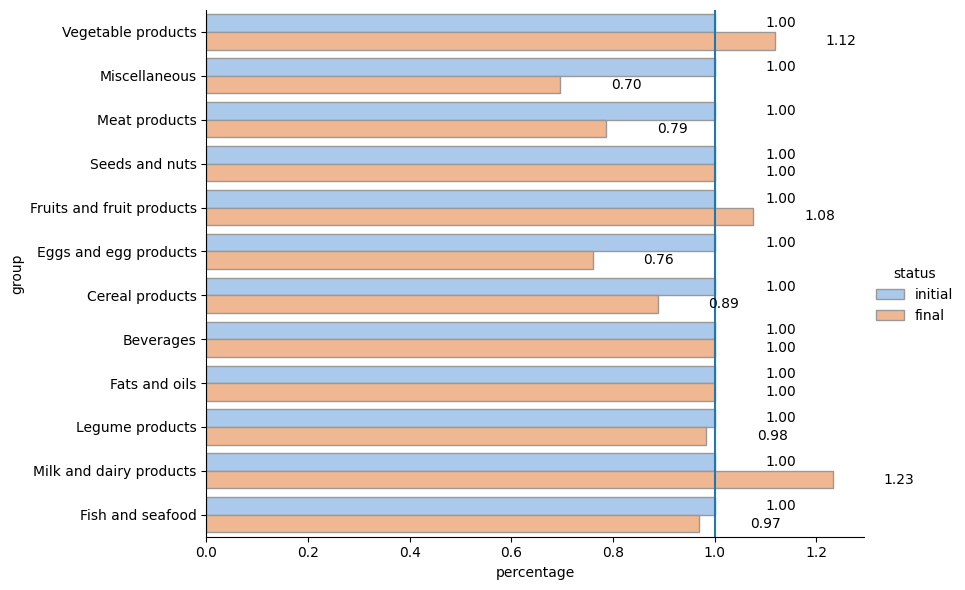

In [22]:
showGroupBarGraph(female25G)

{'nutrient': ['Vegetable products', 'Miscellaneous', 'Meat products', 'Seeds and nuts', 'Fruits and fruit products', 'Eggs and egg products', 'Cereal products', 'Beverages', 'Fats and oils', 'Legume products', 'Milk and dairy products', 'Fish and seafood', 'Vegetable products', 'Miscellaneous', 'Meat products', 'Seeds and nuts', 'Fruits and fruit products', 'Eggs and egg products', 'Cereal products', 'Beverages', 'Fats and oils', 'Legume products', 'Milk and dairy products', 'Fish and seafood'], 'status': ['initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final'], 'value': [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0485477152946725, 1.888888888888889, 0.7553488148468677, 0.0, 1.1183091800877119, 0.6578947368421053, 0.9302631501330205, 1.0011366865586813, 0.0, 0.9908477262241479, 1.251456

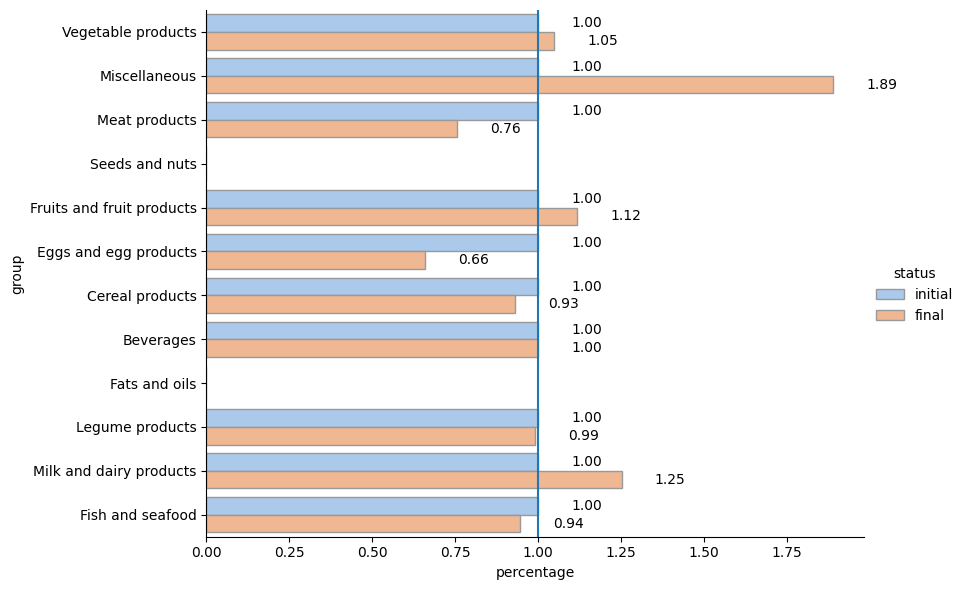

In [23]:
showGroupBarGraph(female60G)

{'nutrient': ['Vegetable products', 'Miscellaneous', 'Meat products', 'Seeds and nuts', 'Fruits and fruit products', 'Eggs and egg products', 'Cereal products', 'Beverages', 'Fats and oils', 'Legume products', 'Milk and dairy products', 'Fish and seafood', 'Vegetable products', 'Miscellaneous', 'Meat products', 'Seeds and nuts', 'Fruits and fruit products', 'Eggs and egg products', 'Cereal products', 'Beverages', 'Fats and oils', 'Legume products', 'Milk and dairy products', 'Fish and seafood'], 'status': ['initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final'], 'value': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.043165766013232, 1.0, 0.7638481685626051, 0.7849462365591398, 1.0306305193602174, 0.6363636363636364, 0.9366632721492267, 1.0002757707793282, 0.0, 0.9588549163286374, 1.144154

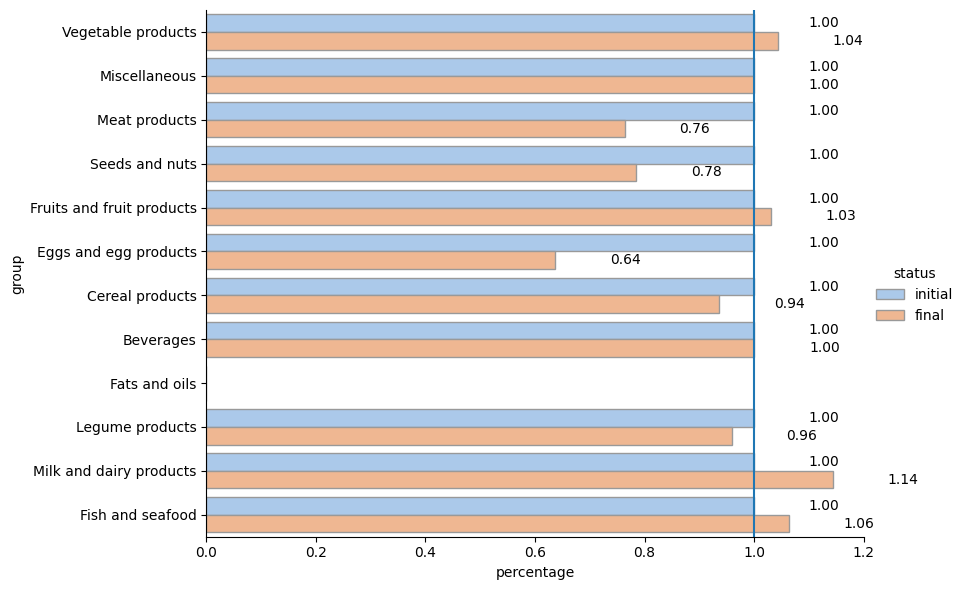

In [24]:
showGroupBarGraph(male25G)

{'nutrient': ['Vegetable products', 'Miscellaneous', 'Meat products', 'Seeds and nuts', 'Fruits and fruit products', 'Eggs and egg products', 'Cereal products', 'Beverages', 'Fats and oils', 'Legume products', 'Milk and dairy products', 'Fish and seafood', 'Vegetable products', 'Miscellaneous', 'Meat products', 'Seeds and nuts', 'Fruits and fruit products', 'Eggs and egg products', 'Cereal products', 'Beverages', 'Fats and oils', 'Legume products', 'Milk and dairy products', 'Fish and seafood'], 'status': ['initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final'], 'value': [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0514139167598473, 0.96579476861167, 0.7856655657668007, 0.0, 1.1221478477549225, 0.7281553398058251, 0.9212862201773209, 1.002746560046106, 0.0, 0.9596268565863161, 1.15513897

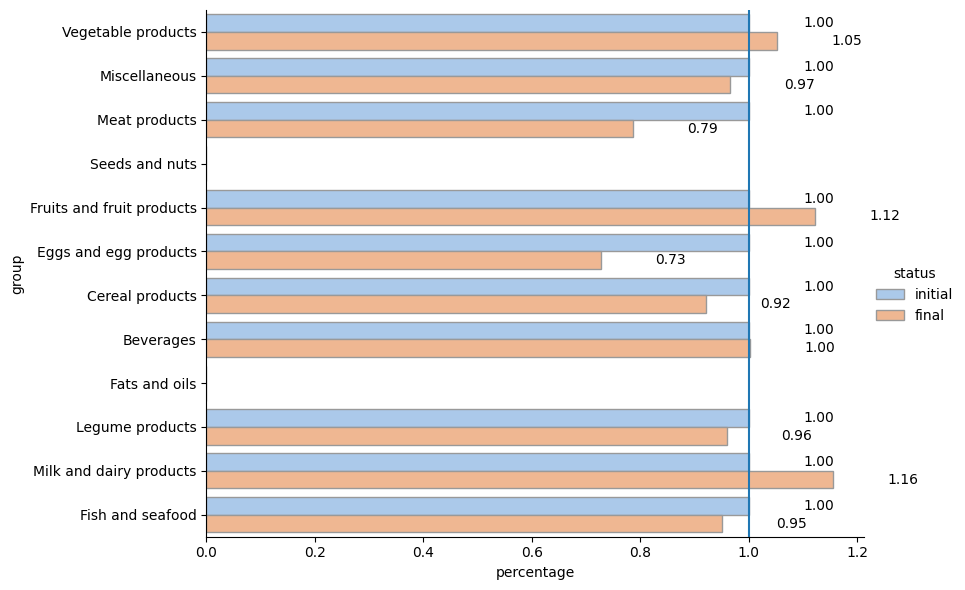

In [25]:
showGroupBarGraph(male60G)

In [26]:
def get_meal_dif(resultList:list[list[SearchResult]], first=0, last=3):
    mealList = get_meals_codes_list()
    
    dif = 0.0
    for meal in mealList:
        for result in resultList:
            dif += abs(result[first].initialMeal[meal]-result[last].finalMeal[meal])
    

    dif /= len(resultList)
           
        
    return dif

In [27]:
for group in range(4):
    first = get_meal_dif(results[group], 0, 0)
    second = get_meal_dif(results[group], 1, 3)
    print(group, first, second, first+second)

0 643.0275555555555 195.90992592592593 838.9374814814814
1 594.44 139.61586419753084 734.0558641975309
2 625.2945000000001 181.40007407407407 806.6945740740741
3 564.1831111111111 183.35472222222222 747.5378333333333


In [28]:
for result in results:
    print( sum( [ quantity for quantity in result[0][0].initialMeal.data.values() ] ) )

2910.0
6890.0
2344.0
4120.5
